<a href="https://colab.research.google.com/github/meeku18/Naive_bayes-model/blob/main/Magic_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


magic04.data contain my dataset

In [ ]:
col=["flength","fwidth","fSize","fConc","fConc1","fAsym","fM3long","fM3Trans","falpha","fdist","class"]
df=pd.read_csv("magic04.data",names=col)
df.head()

,flength,fwidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()
df["class"]=(df["class"]=="g").astype(int)
df.head()

,flength,fwidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


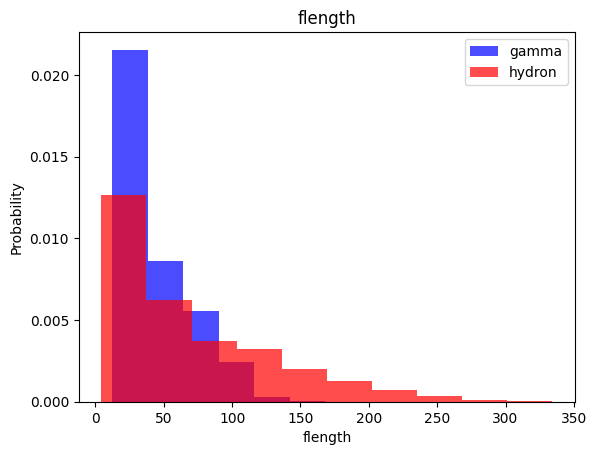

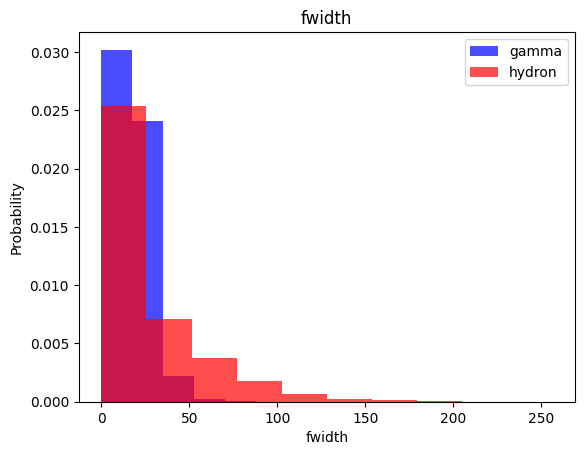

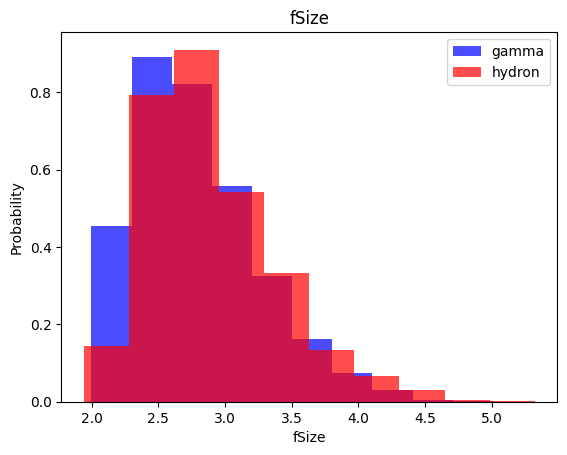

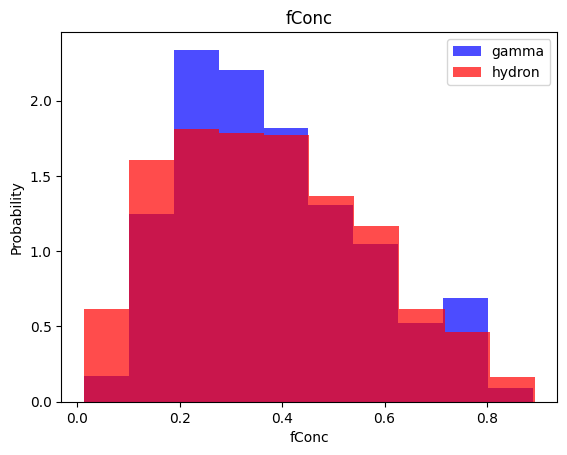

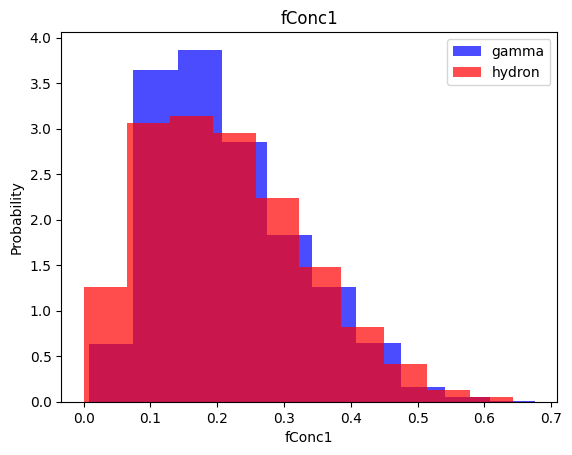

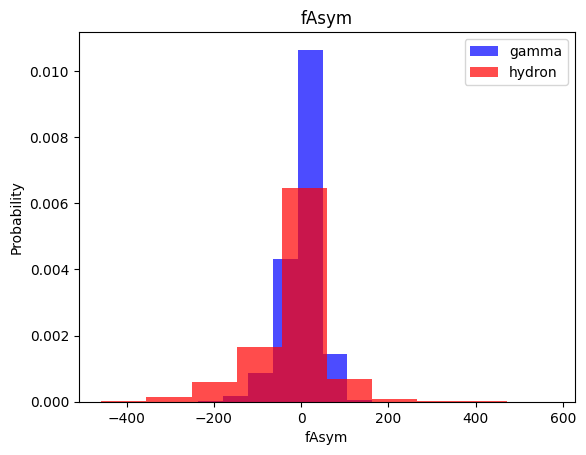

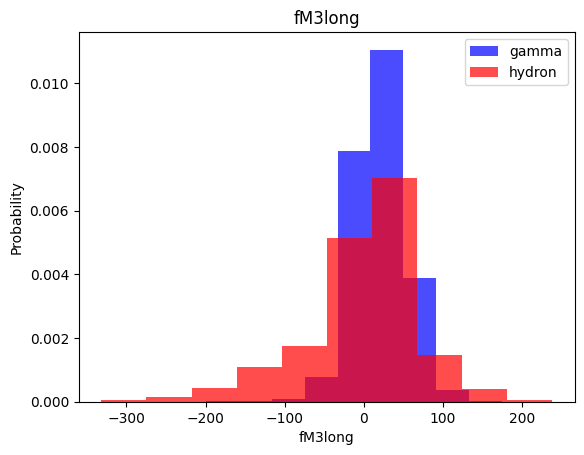

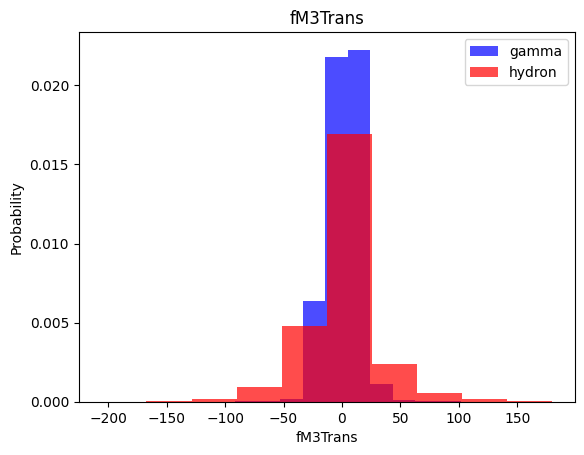

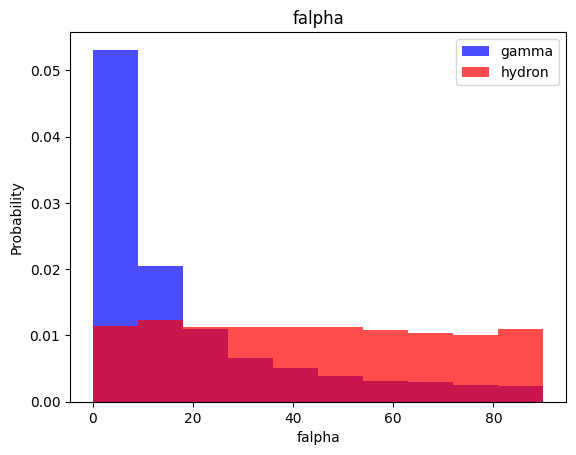

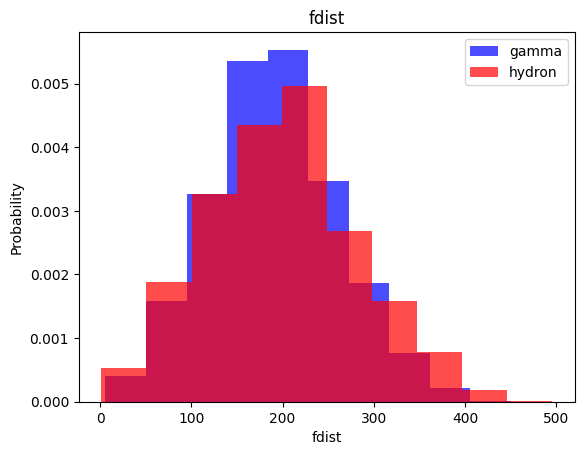

In [ ]:
for label in col[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label="hydron",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


Train, Validate, test datasets

In [ ]:
train, valid, test =np.split(df.sample(frac=1),[int (0.6*len(df)),int (0.8*len(df)) ])

In [ ]:
def scale_dataset(dataframe,overSample=False):
  X=dataframe[dataframe.columns[:-1]].values;
  Y=dataframe[dataframe.columns[-1]].values;

  scaler=StandardScaler()
  X=scaler.fit_transform(X);

  if overSample:
    ros=RandomOverSampler()
    X,Y=ros.fit_resample(X,Y)

  data=np.hstack((X,np.reshape(Y,(-1,1))))
  return data,X,Y

In [ ]:
train,X_train,Y_train=scale_dataset(train,overSample=True)
valid,X_valid,Y_valid=scale_dataset(valid,overSample=False)
test,X_test,Y_test=scale_dataset(test,overSample=False)


#K nearest neighbour


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
Y_predict=knn_model.predict(X_test)

In [ ]:
Y_predict

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
Y_test

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1320
           1       0.87      0.86      0.86      2484

    accuracy                           0.82      3804
   macro avg       0.80      0.81      0.81      3804
weighted avg       0.82      0.82      0.82      3804



Naive bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,Y_train)

In [60]:
Y_predict=nb_model.predict(X_test)

In [61]:
Y_predict

array([1, 0, 1, ..., 0, 1, 1])

In [62]:
Y_train

array([1, 0, 1, ..., 0, 0, 0])

In [65]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.65      0.41      0.50      1320
           1       0.74      0.88      0.80      2484

    accuracy                           0.72      3804
   macro avg       0.69      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804

